In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [4]:
import sys
caffe_root = "/home/roger/caffe/"
sys.path.insert(0, caffe_root + 'python')
import caffe

In [9]:
import os
if os.path.isfile(caffe_root + "models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel"):
    print "CaffeNet found."
else:
    print "Downloading pre_trained caffenet..."
    !/home/roger/caffe/scripts/download_model_binary.py /home/roger/caffe/models/bvlc_reference_caffenet

...100%, 232 MB, 1100 KB/s, 216 seconds passed

In [11]:
# set a CPU mode and load the net from the disk
caffe.set_mode_cpu()

model_def = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def, model_weights, caffe.TEST)

In [17]:
# load the mean ImageNet image for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
print mu.shape

mu = mu.mean(1).mean(1)
print mu.shape

print 'mean-subtracted values:', zip('BGR', mu)


transformer = caffe.io.Transformer({"data": net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

(3, 256, 256)
(3,)
mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


/home/roger/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


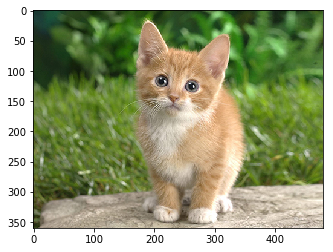

In [18]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(50,        # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227



image = caffe.io.load_image(caffe_root + 'examples/images/cat.jpg')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [19]:
# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = transformed_image

### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax()

predicted class is: 281


In [28]:
print output_prob.argsort()[::-1]

[101 210 179 228 247 305 385 243  65 820 206 116 888 163 100 645 119 346
 178 222 983 980 394 169 217 161 167 386 449 267 130 170 257 256 221 176
 970 147  62 181 159 177   0 413 238 701 180 242 160 129 444 576  53 915
 212 211 162 214 977 389 244 705 241  50 612 975 547 349  48 390 166  58
 525 661 137 395 345 437  57  63 693 821 471 668 296 110 233 183 460  49
 524 215 997 148 764 616 216 652 660 354 251 874 164 132  61  55  45 486
 796  72 595 944 571 128 757 229 302 239 936 234 511 150 375 649  35 388
 297 254 609 165 774 630 149 900  96 236  47 615 568 474  19 727 127 601
 121  56 755 671 190 391 425 307 752 564   4  80 872 866 672 655 348 646
 447 597 781 255 139 146 422 351 501 209 889 304 853 621  69 839 730 194
 535  52 191 125  97 795 740 603 202 205  28 506 366 401 573 450 979 472
 768 735  25 994 538 300 109 172 825 197  34 372 594 143 118  24 665 533
 869  33 328 416 569 518 912 579 798 734 488 131 246 175 433 219 198  68
 702  59  36 430 122 120 802 494 801 808 144 461 70